## Reading jsons

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (7,6)
#plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json

## Read file names
path_to_json = '.'
times_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_mem.json')]
triangulation_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_triangulation_info.json')]

## Read json of no compact files
data_to_append = []
for js in times_files:
    data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()

## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

## Read json of memory files
mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

## Read json of triangulation files
triangulation_data_to_append = []
for js in triangulation_files:
    triangulation_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_triangulation = pd.concat(triangulation_data_to_append, axis=1)
data_triangulation = data_triangulation.transpose()

data_time = data_time.iloc[:16]
data_time_compact = data_time_compact.iloc[:16]
data_mem = data_mem.iloc[:16]
data_triangulation = data_triangulation.iloc[:16]


## Copy tables
data_time_table = data_time.copy(deep = True)
data_time_compact_table = data_time_compact.copy(deep = True)
data_mem_table = data_mem.copy(deep = True)
data_triangulation_table = data_triangulation.copy(deep = True)

#Geometric data as integer
data_time['n_vertices'] = data_time['n_vertices'].astype(int)
data_time['n_half_edges'] = data_time['n_half_edges'].astype(int)
data_time['n_faces'] = data_time['n_faces'].astype(int)
data_time['n_barrier_edge_tips'] = data_time['n_barrier_edge_tips'].astype(int)

data_time_compact['n_vertices'] = data_time_compact['n_vertices'].astype(int)
data_time_compact['n_half_edges'] = data_time_compact['n_half_edges'].astype(int)
data_time_compact['n_faces'] = data_time_compact['n_faces'].astype(int)
data_time_compact['n_barrier_edge_tips'] = data_time_compact['n_barrier_edge_tips'].astype(int)

## Convert byte to gb
data_mem['mem_polylla'] = data_mem['mem_gen_triangulation'] - data_mem['mem_polylla']
data_mem['mem_triangulation'] = data_mem['mem_triangulation']/1000000000
data_mem['mem_compact_triangulation'] = data_mem['mem_compact_triangulation']/1000000000
data_mem['mem_gen_triangulation'] = data_mem['mem_gen_triangulation']/1000000000
data_mem['mem_gen_compact_triangulation'] = data_mem['mem_gen_compact_triangulation']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla']/1000000000
data_mem['mem_gen_polylla'] = data_mem['mem_gen_polylla']/1000000000


## Convert ms to minutes
data_time['time_to_generate_polygonal_mesh'] = data_time['time_to_generate_polygonal_mesh']/60000
data_time['time_triangulation_generation'] = data_time['time_triangulation_generation']/60000
data_time['time_to_label_max_edges'] = data_time['time_to_label_max_edges']/60000
data_time['time_to_label_frontier_edges'] = data_time['time_to_label_frontier_edges']/60000
data_time['time_to_label_seed_edges'] = data_time['time_to_label_seed_edges']/60000
data_time['time_to_label_total'] = data_time['time_to_label_total']/60000
data_time['time_to_traversal_and_repair'] = data_time['time_to_traversal_and_repair']/60000
data_time['time_to_traversal'] = data_time['time_to_traversal']/60000
data_time['time_to_repair'] = data_time['time_to_repair']/60000

data_time_compact['time_to_generate_polygonal_mesh'] = data_time_compact['time_to_generate_polygonal_mesh']/60000
data_time_compact['time_triangulation_generation'] = data_time_compact['time_triangulation_generation']/60000
data_time_compact['time_to_label_max_edges'] = data_time_compact['time_to_label_max_edges']/60000
data_time_compact['time_to_label_frontier_edges'] = data_time_compact['time_to_label_frontier_edges']/60000
data_time_compact['time_to_label_seed_edges'] = data_time_compact['time_to_label_seed_edges']/60000
data_time_compact['time_to_label_total'] = data_time_compact['time_to_label_total']/60000
data_time_compact['time_to_traversal_and_repair'] = data_time_compact['time_to_traversal_and_repair']/60000
data_time_compact['time_to_traversal'] = data_time_compact['time_to_traversal']/60000
data_time_compact['time_to_repair'] = data_time_compact['time_to_repair']/60000

data_triangulation['triangulation_time'] = data_triangulation['triangulation_time']/60000
data_triangulation['memory_usage'] = data_triangulation['memory_usage']/1000000000
data_triangulation['memory_peak'] = data_triangulation['memory_peak']/1000000000

# Time generation data structure and mesh

Text(0, 0.5, 'Time in minutes')

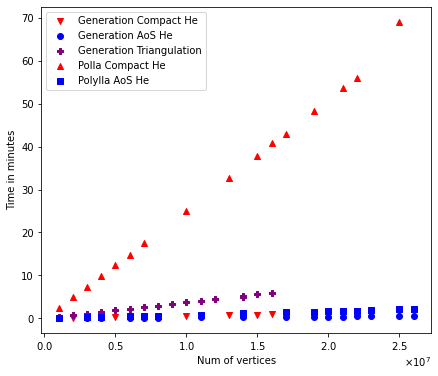

In [10]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="v", label='Generation Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="o",  label='Generation AoS He')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Generation Triangulation')

#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="red",marker="^", label='Polla Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue" ,marker="s",  label='Polylla AoS He')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")

In [11]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
'''
q = """SELECT data_time_table.n_vertices as "#Vertices", data_time_table.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_table.time_triangulation_generation as "Triangulation AoS", data_time_compact_table.time_to_generate_polygonal_mesh as "Polylla Compact", data_time_compact_table.time_triangulation_generation as "Triangulation Compact"
    FROM data_time_table, data_time_compact_table
    WHERE data_time_table.n_vertices = data_time_compact_table.n_vertices
    ORDER BY data_time_table.n_vertices
    LIMIT 10;"""
'''

q = """SELECT data_time.n_vertices as "#Vertices", data_triangulation.triangulation_time as "Delaunay Triangulation", data_time.time_to_generate_polygonal_mesh as "Polylla AoS", data_time.time_triangulation_generation as "Triangulation AoS", data_time_compact.time_to_generate_polygonal_mesh as "Polylla Compact", data_time_compact.time_triangulation_generation as "Triangulation Compact"
    FROM data_time, data_time_compact, data_triangulation
    WHERE data_time.n_vertices = data_time_compact.n_vertices and data_time.n_vertices = data_triangulation.n_points
    ORDER BY data_time.n_vertices Desc
    LIMIT 10"""

pysqldf(q).round(2)

,#Vertices,Delaunay Triangulation,Polylla AoS,Triangulation AoS,Polylla Compact,Triangulation Compact
0,7000000,2.61,0.56,0.13,17.53,0.37
1,6000000,2.21,0.47,0.11,14.83,0.31
2,4000000,1.47,0.32,0.07,9.84,0.20
3,3000000,1.09,0.24,0.06,7.30,0.15
4,1000000,0.36,0.08,0.02,2.42,0.05


# Time by label phases

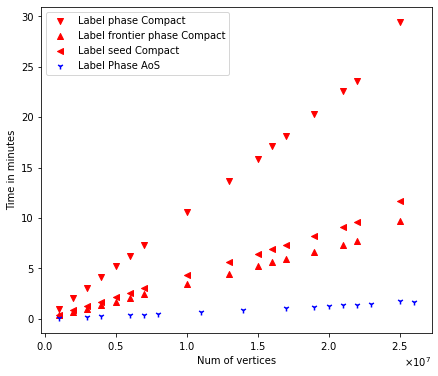

In [12]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Label frontier phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="<", label='Label seed Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="2",  label='Label frontier phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="3",  label='Label seed AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_label_phases.pdf', bbox_inches='tight', dpi=300)

# Time by polylla phases

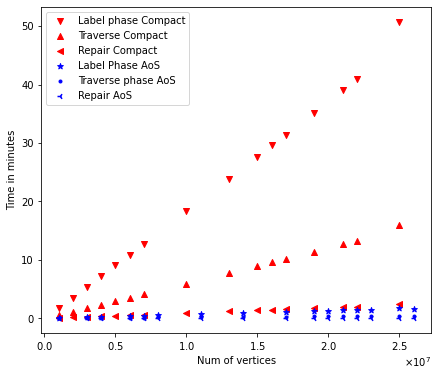

In [13]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'comp_time_polylla_phases.pdf', bbox_inches='tight', dpi=300)


ValueError: x and y must be the same size

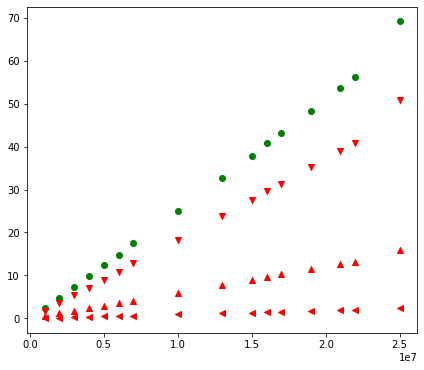

In [14]:
data_time = data_time.iloc[:-1 , :]

plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="green",marker="o", label='Polylla compact total')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair compact')
plt.scatter(data_time_compact.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')


plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_compact_polylla_phases.pdf', bbox_inches='tight', dpi=300)

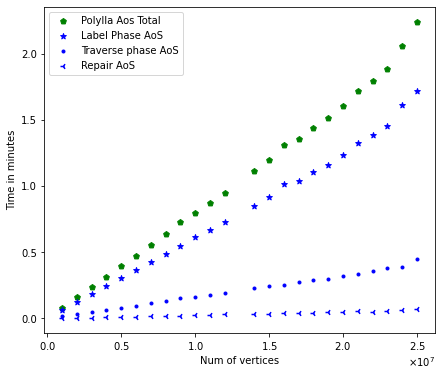

In [ ]:

plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_polylla_AoS_phases.pdf', bbox_inches='tight', dpi=300)

# Memory comp general

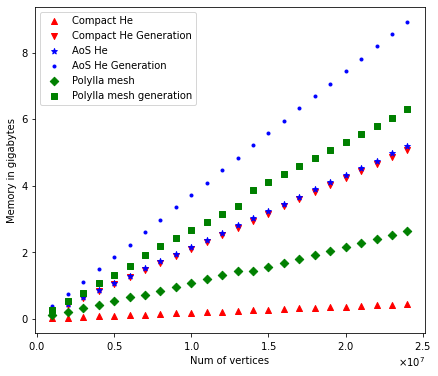

In [ ]:

plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="v", label='Compact He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker=".",  label='AoS He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_polylla, c="green" ,marker="D",  label='Polylla mesh ')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="s",  label='Polylla mesh generation')


plt.legend()
# https://stackoverflow.com/questions/25750170/show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-plot
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")
plt.savefig(r'comp_memory_all.pdf', bbox_inches='tight', dpi=300)



In [ ]:
q = """SELECT num_vertices,  mem_compact_triangulation, mem_gen_compact_triangulation, mem_triangulation, mem_gen_triangulation, mem_polylla, mem_gen_polylla
FROM data_mem
ORDER BY num_vertices DESC
LIMIT 10"""

pysqldf(q)

,num_vertices,mem_compact_triangulation,mem_gen_compact_triangulation,mem_triangulation,mem_gen_triangulation,mem_polylla,mem_gen_polylla
0,24000000,0.437262,5.059237,5.183309,8.926518,2.630573,6.295945
1,23000000,0.419052,4.848341,4.967323,8.554547,2.511163,6.043384
2,22000000,0.400837,4.637778,4.751339,8.182583,2.391757,5.796356
3,21000000,0.382627,4.427164,4.535354,7.810615,2.272352,5.554372
4,20000000,0.364417,4.216416,4.319370,7.438648,2.152944,5.312378
5,19000000,0.346208,4.005486,4.103385,7.066681,2.033541,5.070392
6,18000000,0.327998,3.794773,3.887402,6.694717,1.914132,4.828400
7,17000000,0.309788,3.583882,3.671420,6.322757,1.794739,4.586445
8,16000000,0.291485,3.373525,3.455435,5.950787,1.675326,4.344454
9,15000000,0.273276,3.161713,3.239450,5.578820,1.555923,4.102477
